In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
a = pd.read_csv('./../data/2/4/smp_quotations.csv')
a = a.sort_values(by='date')

In [80]:
a.date.min()

'1991-05-06'

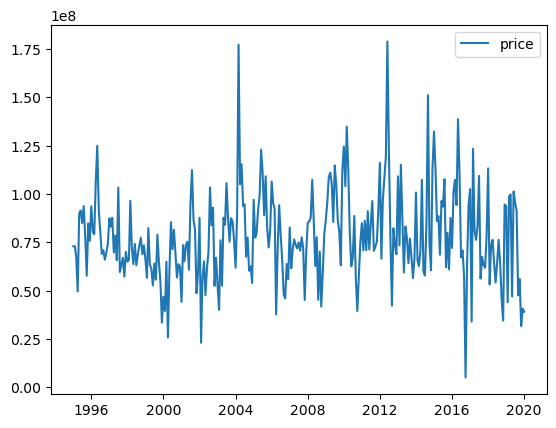

In [47]:
plt.plot(a['raw_value'], label='price')
plt.legend()

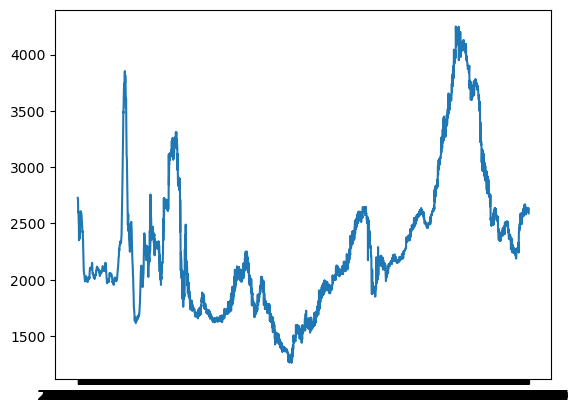

In [7]:
b = pd.read_csv('./../data/1/4/smp_quotations.csv')
b = b.sort_values(by='date')
plt.plot(b['date'], b['price'], label='price')

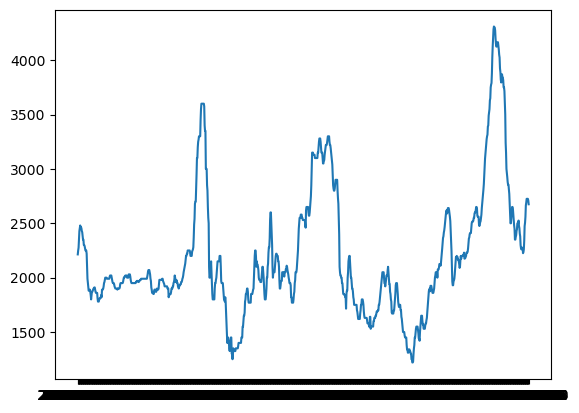

In [8]:
c = pd.read_csv('./../data/67/4/smp_quotations.csv')
c = c.sort_values(by='date')
plt.plot(c['date'], c['price'], label='price')

In [20]:
a.date.max()

'2023-12-21'

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf

# ADF Test for Stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Is Stationary:', result[1] <= 0.05)

# ACF Plot
def plot_acf(series, lags=20):
    acf_values = acf(series, nlags=lags)
    plt.stem(range(1, lags + 1), acf_values[1:])
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Function (ACF)')
    plt.show()

# Apply ADF Test
adf_test(a['raw_value'])


ADF Statistic: -11.339253482637854
p-value: 1.064604285424449e-20
Critical Values: {'1%': -3.4523371197407404, '5%': -2.871222860740741, '10%': -2.571929211111111}
Is Stationary: True


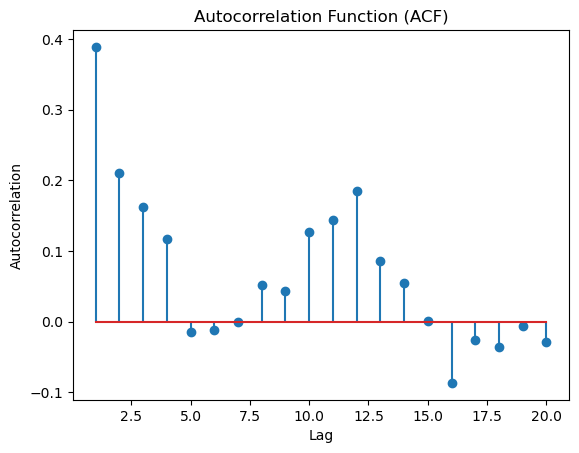

In [51]:
# Plot ACF
plot_acf(a['raw_value'])

In [38]:
import pandas as pd

a = pd.read_csv('./../data/2/4/smp_quotations.csv')

a = a.sort_values(by='date')

a['date'] = pd.to_datetime(a['date'])
a.set_index('date', inplace=True)


b = pd.date_range(start=a.index[-1]  + pd.DateOffset(1), periods=10, freq='W-THU')
print(b)

DatetimeIndex(['2023-12-28', '2024-01-04', '2024-01-11', '2024-01-18',
               '2024-01-25', '2024-02-01', '2024-02-08', '2024-02-15',
               '2024-02-22', '2024-02-29'],
              dtype='datetime64[ns]', freq='W-THU')


In [30]:
a.index[-1]

Timestamp('2023-12-21 00:00:00')

In [32]:
a.index

DatetimeIndex(['1991-05-06', '1991-06-02', '1991-06-12', '1991-09-09',
               '1991-09-12', '1991-09-19', '1991-09-26', '1991-10-03',
               '1991-10-10', '1991-10-17',
               ...
               '2023-10-19', '2023-10-26', '2023-11-02', '2023-11-09',
               '2023-11-16', '2023-11-21', '2023-11-30', '2023-12-07',
               '2023-12-14', '2023-12-21'],
              dtype='datetime64[ns]', name='date', length=1802, freq=None)

In [33]:
a

,Unnamed: 0,id,data_series_id,product_id,data_source_id,data_interval,raw_currency,raw_unit,raw_price,currency,...,created_at.1,updated_at.1,id.2,product_group_id,name.1,slug,created_at.2,updated_at.2,deleted_at,type
date,,,,,,,,,,,,,,,,,,,,,
1991-05-06,7811,437350,961,4,133,weekly,USD,lb,0.8450,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1991-06-02,7809,437348,961,4,133,weekly,USD,lb,0.8425,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1991-06-12,7810,437349,961,4,133,weekly,USD,lb,0.8425,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1991-09-09,7807,437346,961,4,133,weekly,USD,lb,0.8975,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1991-09-12,7806,437345,961,4,133,weekly,USD,lb,0.8800,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21,8194,572903,961,4,133,weekly,USD,lb,1.2075,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
2023-11-30,8207,634080,961,4,133,weekly,USD,lb,1.2000,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
2023-12-07,8217,897568,961,4,133,weekly,USD,lb,1.2000,EUR,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid


In [82]:
import pandas as pd

b = pd.read_csv('./../data/2/4/consumptions.csv')

b = b.sort_values(by='date')

b['date'] = pd.to_datetime(b['date'])
b.set_index('date', inplace=True)

b
# b = pd.date_range(start=a.index[-1]  + pd.DateOffset(1), periods=10, freq='W-THU')
# print(b)

,Unnamed: 0,id,data_series_id,product_id,country_id,data_interval,raw_unit,raw_value,unit,value,...,updated_at.1,deleted_at,id.2,product_group_id,name.1,slug,created_at.2,updated_at.2,deleted_at.1,type
date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,240,1381,2823,4,2,monthly,lb,72897389.38,mt,33066.04,...,2019-02-02 15:06:27,NaN,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1995-02-01,241,1382,2823,4,2,monthly,lb,72993116.87,mt,33109.46,...,2019-02-02 15:06:27,NaN,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1995-03-01,242,1383,2823,4,2,monthly,lb,67784565.65,mt,30746.88,...,2019-02-02 15:06:27,NaN,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1995-04-01,243,1384,2823,4,2,monthly,lb,49533815.72,mt,22468.39,...,2019-02-02 15:06:27,NaN,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1995-05-01,244,1385,2823,4,2,monthly,lb,89935785.07,mt,40794.60,...,2019-02-02 15:06:27,NaN,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01,236,837,2823,4,2,monthly,lb,47571000.00,mt,21578.06,...,2019-02-02 15:06:27,NaN,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
2019-10-01,237,838,2823,4,2,monthly,lb,55954000.00,mt,25380.57,...,2019-02-02 15:06:27,NaN,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
2019-11-01,238,839,2823,4,2,monthly,lb,31616000.00,mt,14340.92,...,2019-02-02 15:06:27,NaN,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid


In [81]:
a

,Unnamed: 0,id,data_series_id,product_id,data_source_id,date,data_interval,raw_currency,raw_unit,raw_price,...,created_at.1,updated_at.1,id.2,product_group_id,name.1,slug,created_at.2,updated_at.2,deleted_at,type
1643,7811,437350,961,4,133,1991-05-06,weekly,USD,lb,0.8450,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1641,7809,437348,961,4,133,1991-06-02,weekly,USD,lb,0.8425,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1642,7810,437349,961,4,133,1991-06-12,weekly,USD,lb,0.8425,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1639,7807,437346,961,4,133,1991-09-09,weekly,USD,lb,0.8975,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1638,7806,437345,961,4,133,1991-09-12,weekly,USD,lb,0.8800,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,8194,572903,961,4,133,2023-11-21,weekly,USD,lb,1.2075,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1798,8207,634080,961,4,133,2023-11-30,weekly,USD,lb,1.2000,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1799,8217,897568,961,4,133,2023-12-07,weekly,USD,lb,1.2000,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid
1800,8226,1651445,961,4,133,2023-12-14,weekly,USD,lb,1.1900,...,2023-05-16 12:37:44,2023-05-16 12:37:44,4,2,SMP (Food),skimmed-milk-powder-food,2019-02-02 15:06:27,2021-02-15 07:54:23,NaN,solid


In [84]:
b.index.max()

Timestamp('2020-01-01 00:00:00')

In [ ]:
raw_value
value

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import joblib











# def read():
#     smp_2_4 = pd.read_csv('./data/2/4/smp_quotations.csv')
#     smp_2_4 = smp_2_4.sort_values(by='date')
#     smp_2_4['date'] = pd.to_datetime(smp_2_4['date'])
#     smp_2_4.set_index('date', inplace=True)
#     return smp_2_4
#
# def split(df):
#     train_size = int(len(df) * 0.9)
#     train, test = df[:train_size], df[train_size:]
#     return train, test
#
# def evaluate_model(fitted_model, test_dataset):
#     predictions = fitted_model.predict(n_periods=len(test_dataset))
#     mse = mean_squared_error(test_dataset['price'], predictions)
#     return mse
#
# data = read()
# train, test = split(data)
#
# # Auto ARIMA model selection
# model = auto_arima(train['price'], suppress_warnings=True, seasonal=False)
# print(f'Chosen ARIMA order: {model.order}')
#
# # Fit the model
# model.fit(train['price'])
#
# # Evaluate on the test set
# mse = evaluate_model(model, test)
# print(f'Mean Squared Error: {mse}')


In [53]:
def split(df):
    train_size = int(len(df) * 0.9)  # 80% for training, adjust as needed
    train, test = df[:train_size], df[train_size:]

    return train, test

In [55]:
train, test = split(a[['raw_value', 'value']])

In [56]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [63]:
def train_model(train_dataset, p, d, q):
    order = (p, d, q)
    model = VARMAX(train_dataset, order=order)
    fitted_model = model.fit()

    return fitted_model

In [64]:
def evaluate_model(fitted_model, test_dataset):
    predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1)
    forecasts = fitted_model.forecast(len(test))
    mse = mean_squared_error(test_dataset['value'], predictions)
    forecasts_mse = mean_squared_error(test_dataset['value'], forecasts)
    print(f'Mean Squared Error: {mse}')
    print(f'Forecast Mean Squared Error: {forecasts_mse}')


In [66]:
model = train_model(train, 20, 0, 0)
# evaluate_model(model, test)
# 
# # Save the fitted model to a file using joblib
# filename = './data/2/4/consumptions_arima_model.joblib'
# joblib.dump(model, filename)

/opt/homebrew/anaconda3/envs/MilkMarketMaster/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/envs/MilkMarketMaster/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


LinAlgError: 2-th leading minor of the array is not positive definite

In [67]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming you have a DataFrame named 'df' with columns 'X' and 'Y'
# You can load your data using pd.read_csv, pd.read_excel, or any other method suitable for your data source.
# Example:
# df = pd.read_csv('your_data.csv')

# Specify the maximum lag to test for causality
max_lag = 5

# Perform Granger's Causality Test
result = grangercausalitytests(a[['raw_value', 'value']], max_lag, verbose=True)

# The result will contain F-statistic and p-value for each lag
# You can interpret the p-values to determine the significance of causality



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8314  , p=0.3626  , df_denom=297, df_num=1
ssr based chi2 test:   chi2=0.8398  , p=0.3594  , df=1
likelihood ratio test: chi2=0.8387  , p=0.3598  , df=1
parameter F test:         F=0.8314  , p=0.3626  , df_denom=297, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6758  , p=0.5095  , df_denom=294, df_num=2
ssr based chi2 test:   chi2=1.3747  , p=0.5029  , df=2
likelihood ratio test: chi2=1.3715  , p=0.5037  , df=2
parameter F test:         F=0.6758  , p=0.5095  , df_denom=294, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5414  , p=0.6543  , df_denom=291, df_num=3
ssr based chi2 test:   chi2=1.6634  , p=0.6451  , df=3
likelihood ratio test: chi2=1.6588  , p=0.6461  , df=3
parameter F test:         F=0.5414  , p=0.6543  , df_denom=291, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4005  , p=0.8082  

/opt/homebrew/anaconda3/envs/MilkMarketMaster/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [68]:
result

{1: ({'ssr_ftest': (0.8314360434300828, 0.36259711979099507, 297.0, 1),
   'ssr_chi2test': (0.8398343873031139, 0.35944414042506423, 1),
   'lrtest': (0.8386610402776569, 0.3597799949324315, 1),
   'params_ftest': (0.8314360448294044, 0.3625971193876759, 297.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6758456542124608, 0.5095146009167792, 294.0, 2),
   'ssr_chi2test': (1.3746792558471141, 0.5029122245817605, 2),
   'lrtest': (1.371528803036199, 0.5037050494729622, 2),
   'params_ftest': (0.6758456548553986, 0.5095146005906862, 294.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5414344463401635, 0.6542843079780842, 291.0, 3),
   'ssr_chi2test': (1.6633759279316365, 0.6451066208043268, 3),
   'lrtest': (1.6587508163520397, 0.6461430269939701, 3),
   'params_ftest': (0.54143445230427, 0.6542843039539863, 291.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0